In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from numpy import exp, log, absolute
from numpy.linalg import norm

In [2]:
'''
 Function that returns risk calculated per sample
 y_output - output data
 y_pred - predicted value of otuput
 samples_count - number of samples input
'''
def risk_calulate(y_output, y_pred, samples_count):
    risk_calculated = 0
    for i in range(samples_count):
        if y_output[i][0] == 1:
            risk_calculated -= np.log(y_pred[i][0])
        else:
            risk_calculated += -1*np.log(1-y_pred[i][0])
    return risk_calculated/samples_count

In [3]:
'''
 Function that returns error calculated per sample
 y_output - output data
 y_pred - predicted value of otuput
 samples_count - number of samples input
'''
def error_calculate(y_output, y_pred, samples_count):
  count = 0
  y_pred = [[1] if predicted_value[0] > 0.5 else [0] for predicted_value 
            in y_pred]
  for i in range(samples_count):
    if y_pred[i][0] != y_output[i][0]:
      count+= 1
  return count/samples_count

In [4]:
'''
 Function that plots the model 
 x_input - input from the data
 theta - calculated from logistic reg.
'''
def plot_model(x_input, theta):

  samples_num = x_input.shape[0]
  for i in range(samples_num):
      plt.plot(x_input[i, 0], x_input[i, 1], 'g.')
  min_x = min(x_input[:, 0])
  max_x = max(x_input[:, 0])
  y_min_x = float(-theta[2] - theta[0] * min_x) / theta[1]
  y_max_x = float(-theta[2] - theta[0] * max_x) / theta[1]
  plt.plot([min_x, max_x], [y_min_x, y_max_x], '-b')
  plt.xlabel('X0'); plt.ylabel('X1')
  plt.grid()
  plt.show()


In [5]:
'''
 Function that plots the error-risk graph 
 error_list - contains the erros in a list
 risk_list - contains the risks in a list
 count - number of iterations
'''
def plot_error_risk_graph(error_list, risk_list, iterations_count):
  print("Total Iterations taken : {0}".format(iterations_count))
  plt.plot(range(iterations_count), error_list,'-',label='Error')
  plt.plot(range(iterations_count), risk_list, 'c-',label='Risk')
  plt.xlabel('Iterations Count')
  plt.ylabel('Error or Risk')
  plt.title('Error Risk Iterations Plot')
  plt.legend()
  plt.grid()
  plt.show()

In [6]:
'''
 Function that performs logistic regression and plots model and error_graph
 y_output - output data
 y_pred - predicted value of otuput
 samples_count - number of samples input
'''
def logistic_reg(x_input=np.empty(0), y_output=np.empty(0), combination={}):
  # Returning both test and train error as zero if anyone of the parameters 
  # is missing
  if len(x_input) == 0 or len(y_output) == 0 or len(combination) == 0:
    print('Input/Output data or step_size tolerance combination missing')
    return 0,0

  # Setting values as per parameters
  samples_count = x_input.shape[0]
  features_count = x_input.shape[1]
  step_size  = combination['step_size']
  tolerance = combination['tolerance']

  # Setting initial theta values to random values,count to zero and 
  # theta_new and theta_prev norm to a large number
  theta = np.random.rand(features_count, 1)
  iterations_count = 0
  theta_diff_norm = 10000

  error_list,risk_list = [],[]

  # Running the loop while theta_diff_norm is greater than tolerance
  while theta_diff_norm > tolerance :
    #Calculating y_predicted by sigmoid function
    y_pred  = 1/ (1 + exp(-(np.matmul(x_input, theta))))
    # Calculating mean error
    error_cal = error_calculate(y_output, y_pred, samples_count)
    error_list.append(error_cal)
    # Calculating risk
    risk_cal = risk_calulate(y_output, y_pred, samples_count)
    risk_list.append(risk_cal)
    # Calculating gradient by using the error, step size,samples count and input
    error   = y_output - y_pred
    gradient  = step_size * 1/samples_count * np.matmul(
        np.transpose(x_input), error)
    # Setting theta_prev and updating theta values, to be used to 
    # calculate theta_diff_norm
    theta_prev = theta
    theta = theta + gradient
    
    theta_diff_norm = norm(theta - theta_prev)
    iterations_count  += 1

  #Plot model and error_graph
  plot_model(x_input, theta)
  plot_error_risk_graph(error_list, risk_list, iterations_count)
  


{'step_size': 0.1, 'tolerance': 0.003}


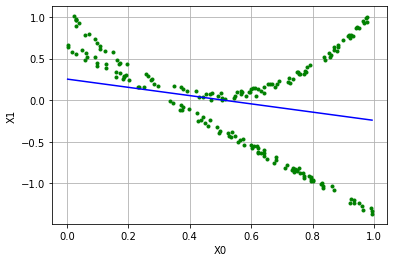

Total Iterations taken : 635


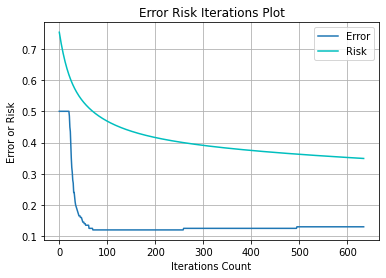

{'step_size': 0.1, 'tolerance': 0.005}


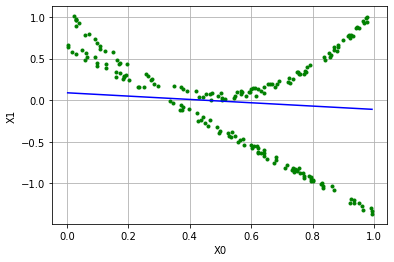

Total Iterations taken : 261


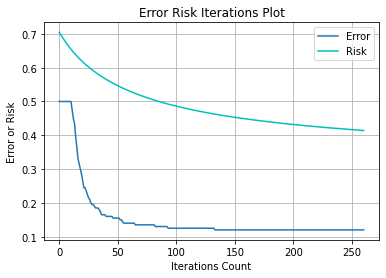

{'step_size': 0.1, 'tolerance': 0.001}


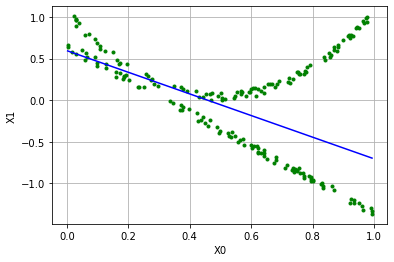

Total Iterations taken : 6557


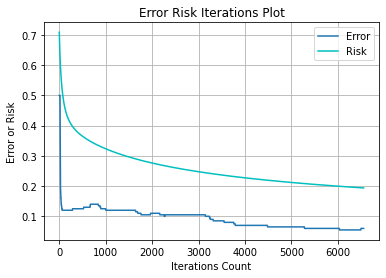

{'step_size': 1.0, 'tolerance': 0.003}


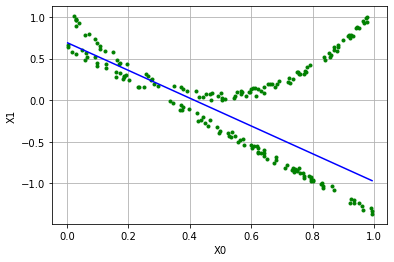

Total Iterations taken : 4612


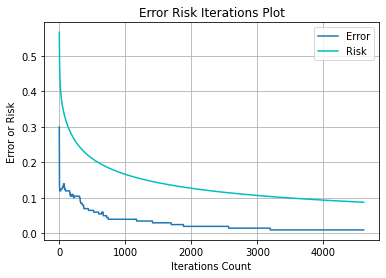

{'step_size': 1.0, 'tolerance': 0.005}


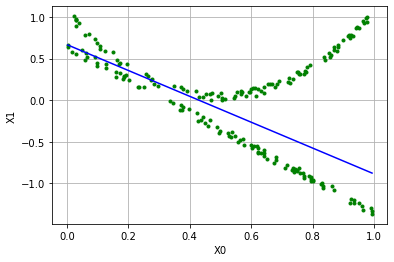

Total Iterations taken : 2096


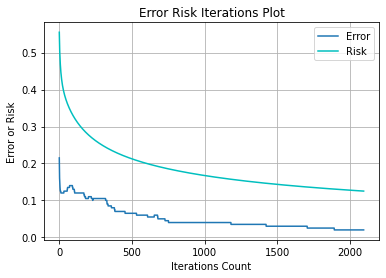

{'step_size': 1.0, 'tolerance': 0.001}


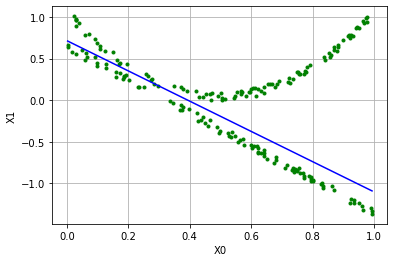

Total Iterations taken : 21759


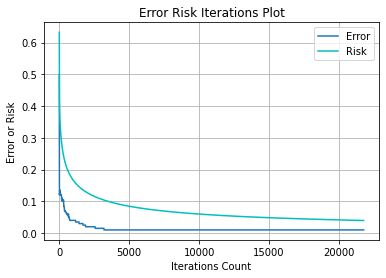

In [ ]:
# Loading .mat file
matlab_data = scipy.io.loadmat('dataset4.mat')
x_input = matlab_data['X']
y_output = matlab_data['Y']

combination_list = [
                    {'step_size': 0.1, 'tolerance': 0.003},
                    {'step_size': 0.1, 'tolerance': 0.005},
                    {'step_size': 0.1, 'tolerance': 0.001},
                    {'step_size': 1.0, 'tolerance': 0.003},
                    {'step_size': 1.0, 'tolerance': 0.005},
                    {'step_size': 1.0, 'tolerance': 0.001}
                    ]
for comb in combination_list:
  print(comb)
  logistic_reg(x_input, y_output, comb)
  